<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Lasso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [6]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = data.target

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
x_train,x_test,y_train,y_test = train_test_split(data.data, data.target, test_size = .2 , random_state = 42)
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

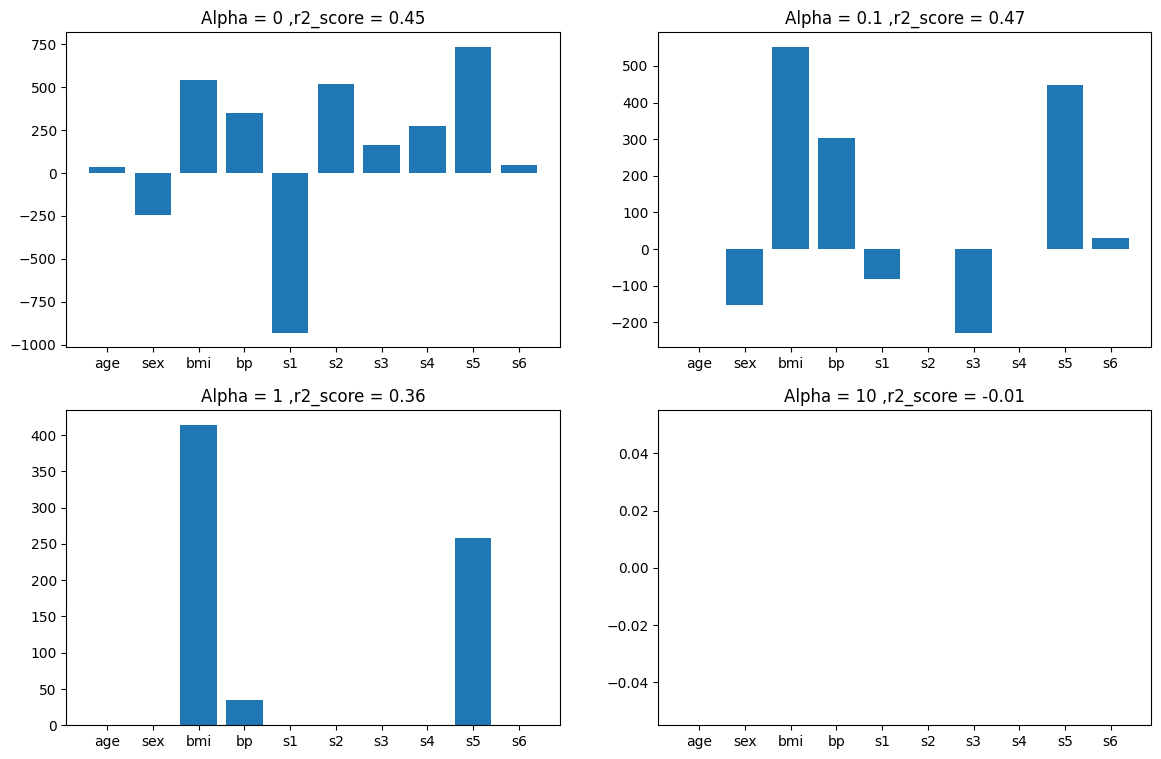

In [9]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [10]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [11]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488838,518.062271,163.419980,275.317901,736.198856,48.670657
0.0001,37.891667,-241.878244,542.524544,347.624893,-924.832045,513.033268,160.224210,274.036385,733.762619,48.690013
0.0010,37.780431,-241.103200,543.386372,346.914418,-864.934721,467.782935,131.468467,262.504646,711.841733,48.864159
0.0100,35.347451,-231.906664,551.303242,341.313469,-483.567140,165.990532,-25.834899,216.875803,566.815003,49.702475
0.1000,0.000000,-152.664779,552.697775,303.365158,-81.365007,-0.000000,-229.255776,0.000000,447.919525,29.642617
1.0000,0.000000,-0.000000,413.431848,34.830515,0.000000,0.000000,-0.000000,0.000000,258.152894,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [12]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

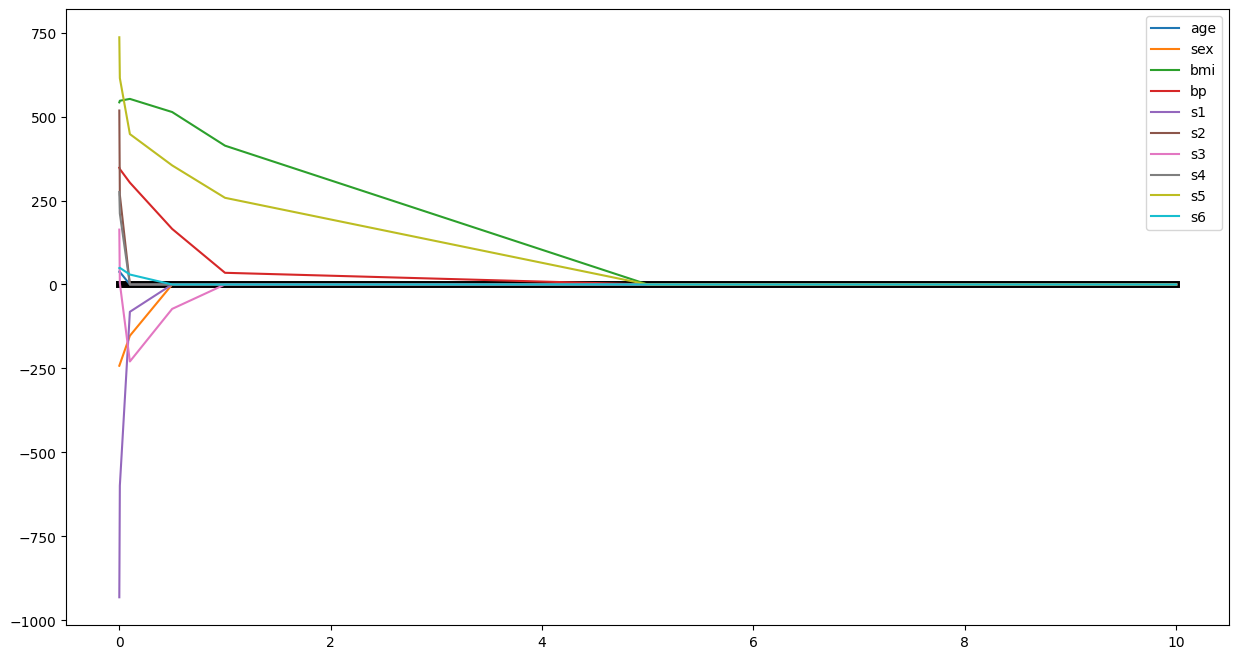

In [13]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

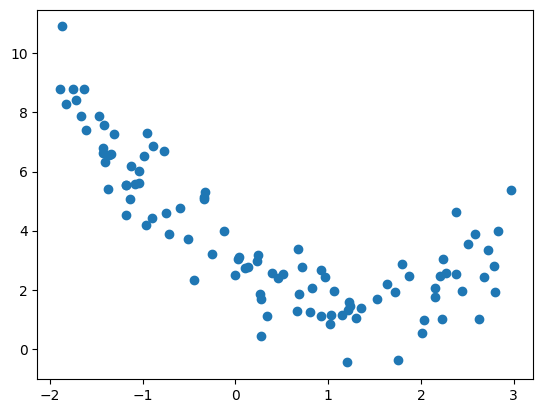

In [14]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.1,random_state=2)

In [16]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+02, tolerance: 6.555e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

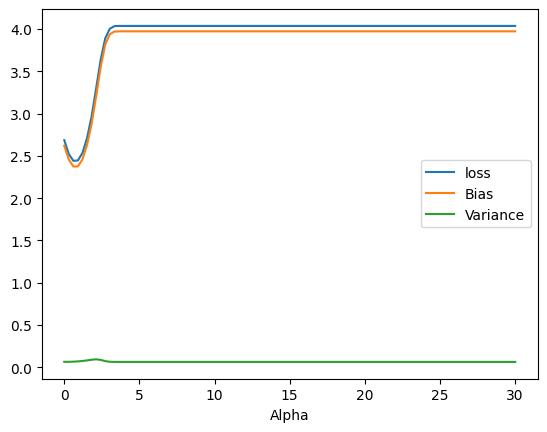

In [17]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


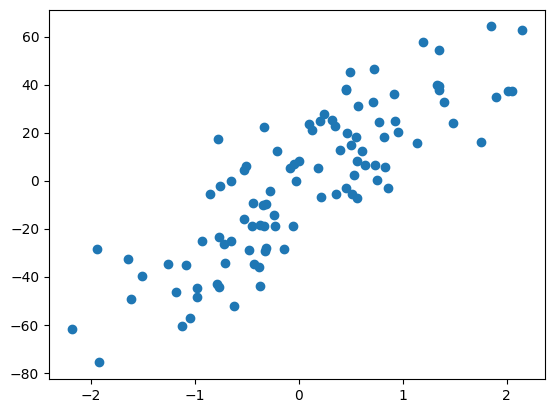

In [18]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)